In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches


In [21]:
filename = '../extradata/retweetsvsfollowers2.csv'
with open(filename) as f:
    content = f.readlines()
    content = [x.strip() for x in content] 

In [22]:
name = []
follower = []
retweets = []
tweetsperday=[]
for line in content:
    name.append(line.split(',')[0])
    follower.append(float(line.split(',')[1]))
    retweets.append(float(line.split(',')[2]))
    tweetsperday.append(float(line.split(',')[3]))

In [23]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl']
bigmainstream = ['tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
val_map = {}
color_map = []
pattern_map = []
# {'orange': 'x', 'lightblue': '//','DodgerBlue': '/', 'greenyellow': '+',}

for node in name:
    if node in junk:
        color_map.append('orange')
        pattern_map.append('x')
    elif node in mainstream:
        color_map.append('lightblue')
        pattern_map.append('/')
    elif node in bigmainstream:
        color_map.append('DodgerBlue')
        pattern_map.append('//')
    elif node in factcheck:
        color_map.append('greenyellow')
        pattern_map.append('+')
    else:
        color_map.append('lightgray')

[4.0, 8.0, 1.0, 61.0, 87.0, 31.0, 50.0, 13.0, 7.0, 7.0, 19.0, 3.0, 2.0, 92.0, 13.0, 64.0, 5.0, 3.0, 0.0, 39.0, 18.0, 20.0, 34.0, 11.0, 28.0, 10.0, 1.0]
[64.0, 128.0, 16.0, 976.0, 1392.0, 496.0, 800.0, 208.0, 112.0, 112.0, 304.0, 48.0, 32.0, 1472.0, 208.0, 1024.0, 80.0, 48.0, 0.0, 624.0, 288.0, 320.0, 544.0, 176.0, 448.0, 160.0, 16.0]


D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


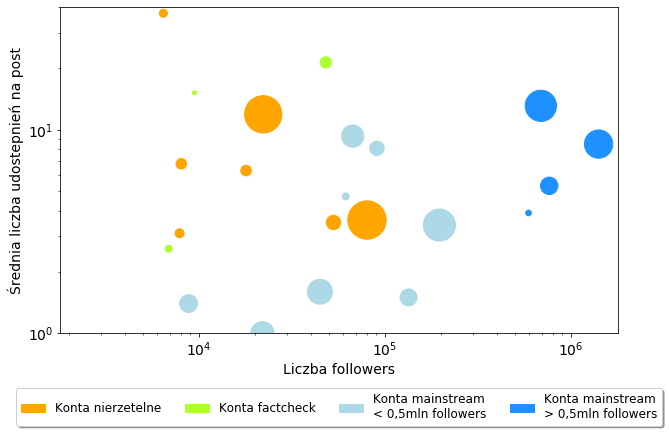

In [64]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize =(10, 6)) 


plt.xscale("log")
plt.yscale("log")
plt.xlim(1800, 1800000)
plt.ylim(1, 40)
print(tweetsperday)

size_list = [i * 16 for i in tweetsperday]
print(size_list)

plt.scatter(follower, retweets, color= color_map,s=size_list)

plt.xlabel('Liczba followers')
plt.ylabel('Średnia liczba udostepnień na post')


junk_patch = mpatches.Patch(color='orange', edgecolor='black', label='Konta nierzetelne')
mainstream_patch = mpatches.Patch(color='lightblue', edgecolor='black', label='Konta mainstream\n< 0,5mln followers')
bigmainstream_patch = mpatches.Patch(color='DodgerBlue', edgecolor='black', label='Konta mainstream\n> 0,5mln followers')
factcheck_patch = mpatches.Patch(color='greenyellow', edgecolor='black', label='Konta factcheck')
plt.legend(handles=[junk_patch,  factcheck_patch, mainstream_patch, bigmainstream_patch,],
           fontsize=12,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)


# Show graphic
plt.show()

